In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10531409180046242833
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1962363114348024977
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7891267104
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5716816467249506051
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:08:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12331661117591132193
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

from keras.layers import LSTM, TimeDistributed
from keras.layers import Convolution2D
from keras.layers import Masking

#batch_size = 200
#batch_size = 110
batch_size = 40
epochs = 30
#epochs = 15
num_classes = 5

In [3]:
model = Sequential()

model.add(TimeDistributed(Convolution2D(32, (7,7), strides=(2, 2),
    #padding='same', activation='relu'), input_shape=self.input_shape))
    padding='same', activation='relu'), input_shape=(None,80,80,1)))
model.add(TimeDistributed(Convolution2D(32, (3,3),
    kernel_initializer="he_normal", activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Convolution2D(64, (3,3),
    padding='same', activation='relu')))
model.add(TimeDistributed(Convolution2D(64, (3,3),
    padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Convolution2D(128, (3,3),
    padding='same', activation='relu')))
model.add(TimeDistributed(Convolution2D(128, (3,3),
    padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Convolution2D(256, (3,3),
    padding='same', activation='relu')))
model.add(TimeDistributed(Convolution2D(256, (3,3),
    padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Flatten()))

model.add(Dropout(0.7))
model.add(Masking(mask_value=-10))
#model.add(Masking(mask_value=-0.1))
model.add(LSTM(512, return_sequences=False, dropout=0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 40, 40, 32)  1600      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 38, 38, 32)  9248      
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 19, 19, 32)  0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 19, 19, 64)  18496     
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 19, 19, 64)  36928     
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 9, 9, 64)    0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 9, 9, 128)   7

In [4]:
import os
import pandas as pd
import random

train_size = 0.8
#seed = -1
seed = 4
#np_dir = '/home/mhaas/Projects/moseq2_tags/PNKD_CT-U19-Opa1_R904S-5_class-zip-np_arrays'
#labels_file = '/home/mhaas/Projects/moseq2_tags/PNKD_CT-U19-Opa1_R904S-5_class-zip-np_arrays/labels.csv'
np_dir = '/home/mhaas/Projects/moseq2_tags/keras_dset'
labels_file = '/home/mhaas/Projects/moseq2_tags/keras_dset/labels.csv'
tag_df = pd.read_csv(labels_file)['Label']
np_list = []
for filename in sorted(os.listdir(np_dir)):
    if filename.endswith('.npz'):
        np_list.append(os.path.join(np_dir,filename))
if seed != -1:
    random.seed(seed)
np_indices = list(range(len(np_list)))
random.shuffle(np_indices)
#np_indices = np_indices[:1000]#!!!DELETE!!!
train_test_split_index = int(train_size*len(np_indices))

In [5]:
import numpy as np
#from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt#DELETE

def np_image_generator(np_indices,np_list,tag_df,bs,cs,mode='train'):
    length  = len(np_indices)
    x = []
    #y = np.zeros((length),dtype=np.int64)
    y = []
    #for i in tqdm(range(length)):
    #for i in tqdm(range(length)):
    '''print('tag_df len: {}'.format(len(tag_df)))#DELETE
    print(tag_df)#DELETE'''
    #DELETE BELOW
    '''for i in range(10):
        print('index: {}\nnp_index: {}'.format(i,np_indices[i]))
        print('tag_df[{}]: {}'.format(i,tag_df[i]))
        print('tag_df[{}]: {}\n'.format(np_indices[i],tag_df[np_indices[i]]))'''
    #DELETE ABOVE
    for i in range(length):
        np_index = np_indices[i]
        #print('np_index: {}'.format(np_index))#DELETE
        '''file = np_list[np_index]
        x.append(file)'''
        x.append(np_list[np_index])
        #y[i] = tag_df[np_index]
        y.append(tag_df[np_index])
    l_encoder = LabelBinarizer()
    y_one_hot = l_encoder.fit_transform(y)
    '''print('np_indices[:10]: {}'.format(np_indices[:10]))#DELETE
    print(y[:20])#DELETE
    print(y_one_hot[:20])#DELETE'''
    
    pad_len = np.load(x[0])['arr_0'].shape[1]
    #print('pad_len: {}'.format(pad_len))#DELETE
    #print('pad val test, should see -10: {}'.format(np.load(x[0])['arr_0']))#DELETE
    index = 0
    while True:
        batch_insts = np.full((bs,pad_len,80,80,1),-10,dtype=np.int8)#Testing with float32, that's what's used in pytorch
        #batch_labels = np.zeros((bs,cs))
        batch_labels = np.zeros((bs,cs),dtype=np.int8)
        for i in range(bs):
            if len(np_indices) <= index:
                index = 0
                if mode == 'eval':
                    break
            batch_insts[i] = np.load(x[index])['arr_0'][0].reshape(pad_len,80,80,1)
            #batch_labels[i] = y[index]
            batch_labels[i] = y_one_hot[index]
            index += 1
            '''#DELETE BELOW
            print('------------------------------------------------------------------------')
            #tag_index = y_one_hot[index].index(1)
            tag_index = np.where(y_one_hot[index] == 1)[0]
            if tag_index == 0:
                print('dart')
            elif tag_index == 1:
                print('micro')
            elif tag_index == 2:
                print('pause')
            elif tag_index == 3:
                print('rear')
            else:
                print('walk')
            for frame in batch_insts[i].reshape(pad_len,80,80):
                if frame[0][0] == -10:
                    break
                plt.imshow(frame,cmap=plt.get_cmap('gray'),vmin=0,vmax=100)
                plt.show()
        break
            #DELETE ABOVE'''
            #'''print('batch_insts shape: {}'.format(batch_insts.shape))#DELETE
            #print('batch_insts type: {}'.format(batch_insts.dtype))#DELETE
            #print('batch_labels shape: {}'.format(batch_labels.shape))#DELETE
            #print('batch_labels type: {}\n'.format(batch_labels.dtype))#DELETE'''
        #print('\n{}'.format(batch_labels))#DELETE
        yield(batch_insts,batch_labels)

In [6]:
'''train_gen = h5_image_generator(h5_file,x_train,y_train,batch_size,
                               num_classes,max_len)
test_gen = h5_image_generator(h5_file,x_test,y_test,batch_size,
                              num_classes,max_len)'''

train_gen = np_image_generator(np_indices[:train_test_split_index],np_list,tag_df,batch_size,num_classes)
test_gen = np_image_generator(np_indices[train_test_split_index:],np_list,tag_df,batch_size,num_classes)

In [7]:
tag_df

0         1
1         0
2         1
3         2
4         3
         ..
321623    0
321624    1
321625    3
321626    1
321627    1
Name: Label, Length: 321628, dtype: int64

In [8]:
#DELETE CELL
print('steps_per_epoch: {}'.format(train_test_split_index // batch_size))
print('validation_steps: {}'.format((len(np_indices)-train_test_split_index) // batch_size))

steps_per_epoch: 6432
validation_steps: 1608


In [9]:
H = model.fit_generator(
    train_gen,
    #steps_per_epoch = len(x_train) // batch_size,
    steps_per_epoch = train_test_split_index // batch_size,
    validation_data = test_gen,
    #validation_steps = len(x_test) // batch_size,
    validation_steps = (len(np_indices)-train_test_split_index) // batch_size,
    epochs = epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
6432/6432 [==============================] - 1154s 179ms/step - loss: 0.7758 - accuracy: 0.6804 - val_loss: 0.6193 - val_accuracy: 0.7500
Epoch 2/30
6432/6432 [==============================] - 1154s 179ms/step - loss: 0.6095 - accuracy: 0.7583 - val_loss: 0.5649 - val_accuracy: 0.7791
Epoch 3/30
6432/6432 [==============================] - 1154s 179ms/step - loss: 0.5643 - accuracy: 0.7776 - val_loss: 0.5495 - val_accuracy: 0.7859
Epoch 4/30
6432/6432 [==============================] - 1155s 180ms/step - loss: 0.5432 - accuracy: 0.7864 - val_loss: 0.5210 - val_accuracy: 0.7956
Epoch 5/30
6432/6432 [==============================] - 1154s 179ms/step - loss: 0.5330 - accuracy: 0.7905 - val_loss: 0.5180 - val_accuracy: 0.7959
Epoch 6/30
6432/6432 [==============================] - 1154s 179ms/step - loss: 0.5283 - accuracy: 0.7926 - val_loss: 0.5085 - val_accuracy: 0.8033
Epoch 7/30
6432/6432 [========

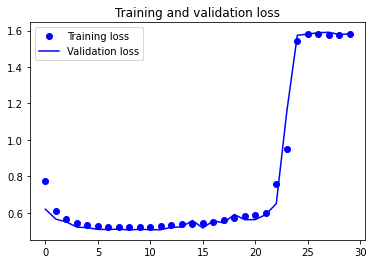

In [10]:
from matplotlib import pyplot as plt

loss = H.history['loss']
val_loss = H.history['val_loss']
plt.figure()
plt.plot(range(epochs), loss, 'bo', label='Training loss')
plt.plot(range(epochs), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('H_results_lrcn4_'+str(epochs)+'e.png')
plt.show()

In [11]:
model.save('lrcn4_'+str(epochs)+'e.h5')

In [12]:
from keras.utils import plot_model
plot_model(model, to_file='lrcn4_model_'+str(epochs)+'e.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


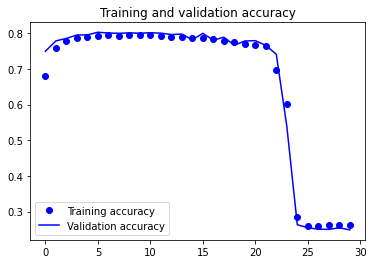

In [20]:
#acc = H.history['acc']
#val_acc = H.history['val_acc']
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
plt.figure()
plt.plot(range(epochs), acc, 'bo', label='Training accuracy')
plt.plot(range(epochs), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('H_accuracy_results_lrcn4_'+str(epochs)+'e.png')
plt.show()

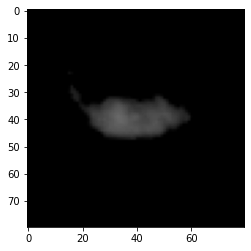

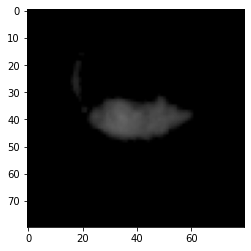

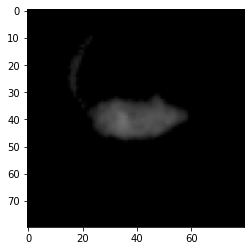

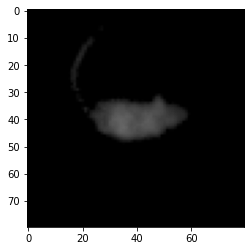

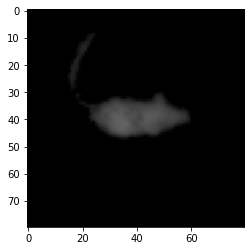

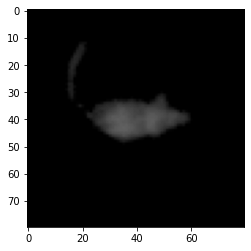

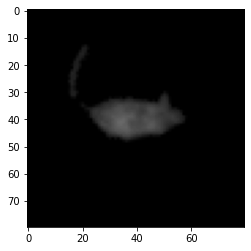

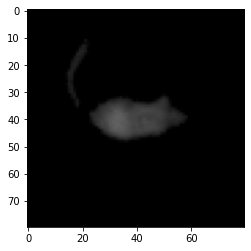

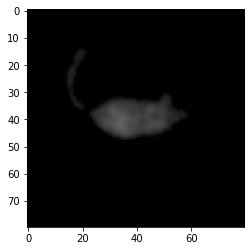

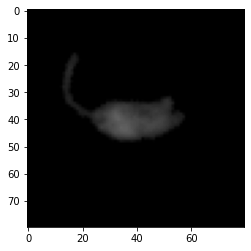

In [21]:
import matplotlib.pyplot as plt

inst_index = 0
inst_np = np.load(np_list[np_indices[inst_index]])['arr_0'][0]
for frame in inst_np:
    if frame[0][0] == -10:
        break
    plt.imshow(frame,cmap=plt.get_cmap('gray'),vmin=0,vmax=100)
    plt.show()